# <center>Media-Mix Model</center>
<img src="https://d31029zd06w0t6.cloudfront.net/wp-content/uploads/sites/54/2020/04/web1_Starbucks-1.jpg" width="240" height="240" align="center"/>

### <center>Predictions on marketing offers and campaigns.</center>

In [1]:
import pandas as pd
import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import matplotlib.style as style

In [2]:
#portfolio.json: containing offer ids and meta data about each offer (duration, type, etc.)
portfolio_df = pd.read_json('portfolio.json', lines=True)
portfolio_df.head()
#bogo : Buy One Get One.
#informational and discounts.

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
#profile.json: demographic data for each customer
profile_df = pd.read_json('profile.json', lines=True)
profile_df.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [4]:
#transcript.json: records for transactions, offers received, offers viewed, and offers completed
transcript_df = pd.read_json("transcript.json", lines=True)
transcript_df.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


## <center>Exploring the dataset.</center>

#### Portfolio.json : contains information on all of the offers ran by Starbucks.
id (string) — offer id<br>
offer_type (string) — type of offer ie BOGO, discount, informational<br>
difficulty (int) — minimum required of spending to complete an offer<br>
reward (int) — reward given for completing an offer<br>
duration (int) — the period of validity for the offer<br>
channels (list of strings) — the medium through which the offer was sent through<br>

In [5]:
portfolio_df['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [6]:
portfolio_df.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [7]:
portfolio_df.channels

0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

From the above analysis we can see that 10 different campaigns where ran with three different types of offer deployed these were bogo (Buy One Get One Free), informational and discounts. They were distributed across the web, email, mobile and social media. They ranged in length between 3-10 days. Had an average difficulty (minimum spend) of 8.5 dollars and an average reward of 4 dollars.

#### Profile.json : user profile data to see what information we have for individual consumers.
age (int) — age of the customer<br>
became_member_on (int) — data when customer created an app account<br>
gender (str) — gender of the customer<br>
id (str) — customer id<br>
income (float) — customer’s income<br>

In [8]:
profile_df.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [9]:
profile_df.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [10]:
profile_df.groupby('gender').count()

,age,became_member_on,id,income
gender,,,,
F,6129,6129,6129,6129
M,8484,8484,8484,8484
O,212,212,212,212


In [11]:
profile_df['income'].isna().sum()

2175

/usr/local/envs/py3env/lib/python3.5/site-packages/seaborn/categorical.py:1424: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


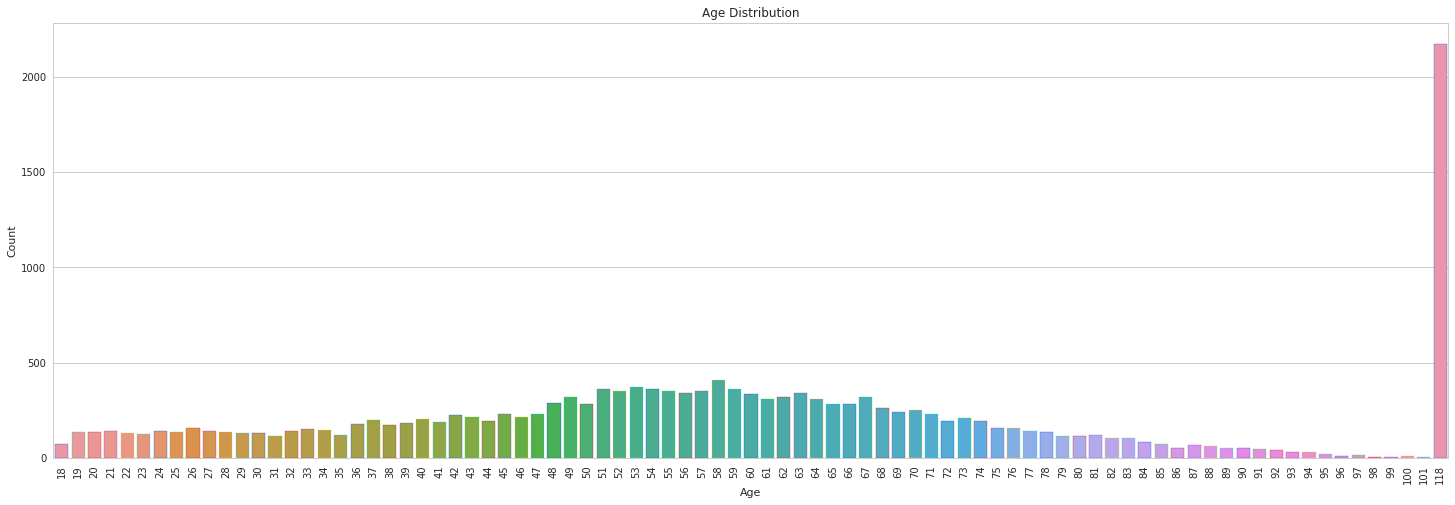

In [12]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid") 
fig = plt.figure(figsize=(25,8))
sns.countplot(x="age",
              data=profile_df,
              edgecolor=sns.color_palette("bright", 6)).set_title("Age Distribution")
plt.ylabel("Count")
plt.xlabel("Age")
plt.xticks(rotation=90)
plt.show()

In [13]:
(profile_df.age == 118).sum()

2175

/usr/local/envs/py3env/lib/python3.5/site-packages/seaborn/categorical.py:1424: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


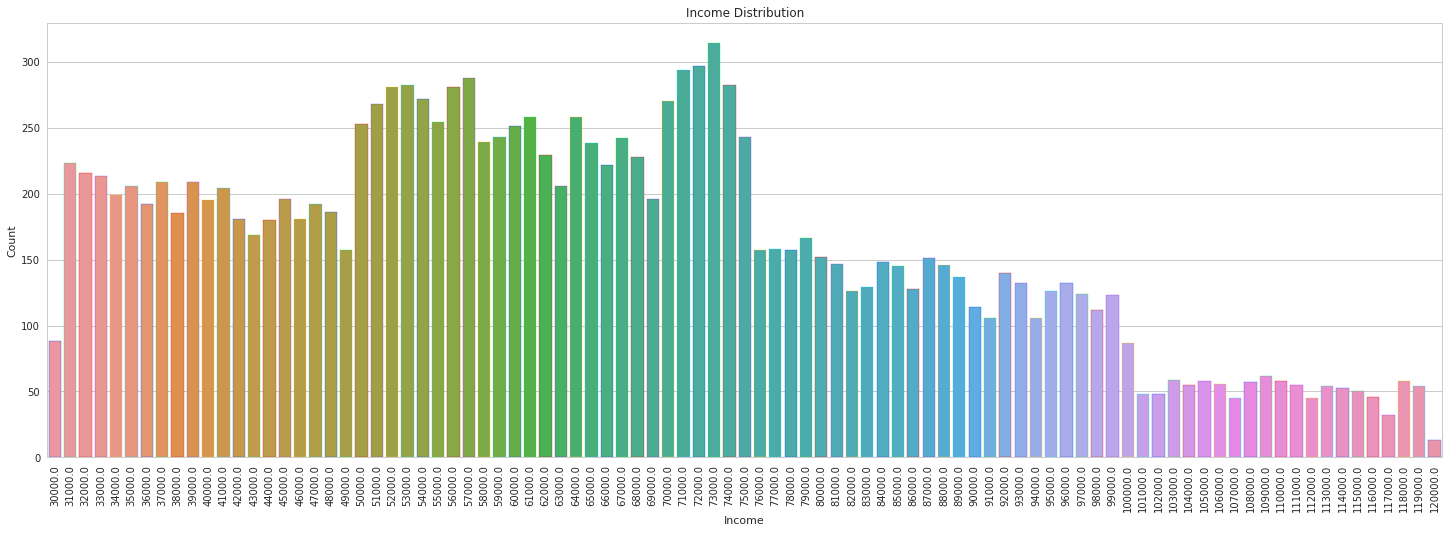

In [14]:
fig = plt.figure(figsize=(25,8))
sns.countplot(x="income",
              data=profile_df,
              edgecolor=sns.color_palette("bright", 6)).set_title("Income Distribution")
plt.ylabel("Count")
plt.xlabel("Income")
plt.xticks(rotation=90)
plt.show()

From the profile data we can see that there are 17,000 consumers in the dataset with ~6100 female, ~8400 male and ~200 unknown. The users joined between 29th July 2013 and 26th July 2018. We have data on around 15,000 of the users that have an income between 30,000-120,000 with the average of 64,000. 

#### Transcript.json : contains information on all of the transactions throughout the 30 day period.
event (str) — record description (ie transaction, offer received, offer viewed, etc)<br>
person (str) — customer id<br>
time (int) — time in hours. The data begins at time t=0<br>
value (dict of strings) — either an offer id or transaction amount depending on the record

In [15]:
transcript_df.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [16]:
transcript_df.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [17]:
transcript_df.groupby('event').count()

,person,time,value
event,,,
offer completed,33579,33579,33579
offer received,76277,76277,76277
offer viewed,57725,57725,57725
transaction,138953,138953,138953


Frome the transcript data we can see that 306,534 events have been logged by starbucks and the majority of these (138,953) are transactions, with ~76000 offers received, ~58,00 viewed and 33,579 completed. The time column ranges from zero to 714 minutes and shows the time throughout the observation period with a max of around 30 days as expected.

## <center>Data Cleaning</center><br>
<center>Quite a task!  {◕ ◡ ◕}</center>

#### Transaction Data.

In [18]:
transcript_df['interaction'] = [list(x.keys())[0] for x in transcript_df['value']]
transcript_df['id'] = [list(x.values())[0] for x in transcript_df['value']]

In [19]:
transcript_df['interaction'].unique()

array(['offer id', 'amount', 'offer_id'], dtype=object)

In [20]:
transcript_df = transcript_df.drop(columns=['value'])
transcript_df['interaction'] = [x.replace('offer id','offer_id') for x in transcript_df['interaction']]
temp_df = pd.get_dummies(transcript_df['interaction'])

In [21]:
transcript_df = pd.concat([temp_df, transcript_df], axis=1)
temp_df = pd.get_dummies(transcript_df['event'])
transcript_df = pd.concat([temp_df, transcript_df], axis=1)
transcript_df = transcript_df.drop(columns=['interaction','event'])    

In [22]:
transcript_df.head()

,offer completed,offer received,offer viewed,transaction,amount,offer_id,person,time,id
0,0,1,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,0,1,0,0,0,1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,0,1,0,0,0,1,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5
3,0,1,0,0,0,1,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4
4,0,1,0,0,0,1,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0


#### Profile data.

In [23]:
profile_df['age'] = profile_df['age'].replace(118,0)
profile_df['member joined'] = pd.to_datetime(profile_df['became_member_on'], format='%Y%m%d')
profile_df['income'] = profile_df['income'].fillna(0)

In [24]:
profile_df['gender'] = profile_df['gender'].replace('M','male')
profile_df['gender'] = profile_df['gender'].replace('F','female')
profile_df['gender'] = profile_df['gender'].replace('O','other')
profile_df['gender'] = profile_df['gender'].fillna('unknown gender')

In [25]:
temp_df = pd.get_dummies(profile_df['gender'])
profile_df = pd.concat([temp_df, profile_df], axis=1)
profile_df = profile_df.drop(columns=['gender'])

In [26]:
profile_df.columns = ['female', 'male', 'other', 'unknown gender', 'age', 'became_member_on','person', 'income', 'member joined']
profile_df.head(10)

,female,male,other,unknown gender,age,became_member_on,person,income,member joined
0,0,0,0,1,0,20170212,68be06ca386d4c31939f3a4f0e3dd783,0.0,2017-02-12
1,1,0,0,0,55,20170715,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15
2,0,0,0,1,0,20180712,38fe809add3b4fcf9315a9694bb96ff5,0.0,2018-07-12
3,1,0,0,0,75,20170509,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09
4,0,0,0,1,0,20170804,a03223e636434f42ac4c3df47e8bac43,0.0,2017-08-04
5,0,1,0,0,68,20180426,e2127556f4f64592b11af22de27a7932,70000.0,2018-04-26
6,0,0,0,1,0,20170925,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,2017-09-25
7,0,0,0,1,0,20171002,68617ca6246f4fbc85e91a2a49552598,0.0,2017-10-02
8,0,1,0,0,65,20180209,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02-09
9,0,0,0,1,0,20161122,8974fc5686fe429db53ddde067b88302,0.0,2016-11-22


In [27]:
print("The number of Males : " + str((profile_df.male==1).sum()))
print("The number of Females : " + str((profile_df.female==1).sum()))
print("The number of Others : " + str((profile_df.other==1).sum()))

The number of Males : 8484
The number of Females : 6129
The number of Others : 212


#### Portfolio data.

In [28]:
temp_df = pd.DataFrame(columns=['web', 'email', 'mobile','social'])
temp_list = []
for index, row in portfolio_df.iterrows():      #iterating over rows.
  for value in row['channels']:
    temp_list.append({'index': index, 'value':value})

In [29]:
temp_df = temp_df.append(temp_list, ignore_index=False)
temp_df = temp_df.groupby('index')['value'].value_counts()
temp_df = temp_df.unstack(level=-1).fillna(0) #Returns a DataFrame having a new level(-1 = last level) of column labels
                                              #whose inner-most level consists of the pivoted index labels.

/usr/local/envs/py3env/lib/python3.5/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [30]:
portfolio_df = pd.concat([temp_df, portfolio_df], axis=1)
temp_df = pd.get_dummies(portfolio_df['offer_type'])
portfolio_df = pd.concat([temp_df, portfolio_df], axis=1)
portfolio_df = portfolio_df.drop(columns=['offer_type','channels'])

In [31]:
portfolio_df.head()

,bogo,discount,informational,email,mobile,social,web,difficulty,duration,id,reward
0.0,1,0,0,1.0,1.0,1.0,0.0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10
1.0,1,0,0,1.0,1.0,1.0,1.0,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10
2.0,0,0,1,1.0,1.0,0.0,1.0,0,4,3f207df678b143eea3cee63160fa8bed,0
3.0,1,0,0,1.0,1.0,0.0,1.0,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5
4.0,0,1,0,1.0,0.0,0.0,1.0,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5


#### Offer Influence.

In [32]:
transactions_df = transcript_df[transcript_df['transaction'] == 1]
transactions_df = transactions_df[['person','time','id']]
transactions_df.columns = ['person','transaction_time','spend']

In [33]:
transactions_df.shape

(138953, 3)

In [34]:
transactions_df.head()

,person,transaction_time,spend
12654,02c083884c7d45b39cc68e1314fec56c,0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,34.56
12659,54890f68699049c2a04d415abc25e717,0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0,18.97


Offers that were received/viewed/completed combined with portfolio data >>

In [35]:
received_offer = transcript_df[transcript_df['offer received'] == 1]
received_offer = received_offer[['offer received','person', 'time', 'id']]
received_offer.columns = ['offer received','person', 'time_received', 'id_offer']    

In [36]:
veiwed_offer = transcript_df[transcript_df['offer viewed'] == 1]
veiwed_offer = veiwed_offer[['offer viewed','person', 'time', 'id']]
veiwed_offer.columns = ['offer viewed','person', 'time_viewed', 'id_offer']

In [37]:
completed_offer = transcript_df
completed_offer = completed_offer[['offer completed','person', 'time', 'id']]
completed_offer.columns = ['offer completed','person', 'time_completed', 'id_offer']

In [38]:
merged_veiws = received_offer.merge(veiwed_offer, on=['person','id_offer']) 
merged_completed = merged_veiws.merge(completed_offer, on=['person','id_offer']) 
merged_completed = merged_completed[merged_completed['time_viewed'] > 
                                        merged_completed['time_received']]
portfolio_df = portfolio_df.rename(columns = {'id':'id_offer'})
offers = merged_completed.merge(portfolio_df, on=['id_offer'])

In [39]:
offers.head()

,offer received,person,time_received,id_offer,offer viewed,time_viewed,offer completed,time_completed,bogo,discount,informational,email,mobile,social,web,difficulty,duration,reward
0,1,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6,0,0,1,0,0,1.0,1.0,0.0,1.0,5,7,5
1,1,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6,0,6,1,0,0,1.0,1.0,0.0,1.0,5,7,5
2,1,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6,1,132,1,0,0,1.0,1.0,0.0,1.0,5,7,5
3,1,ebe7ef46ea6f4963a7dd49f501b26779,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,714,0,0,1,0,0,1.0,1.0,0.0,1.0,5,7,5
4,1,ebe7ef46ea6f4963a7dd49f501b26779,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,714,0,576,1,0,0,1.0,1.0,0.0,1.0,5,7,5


Buy One Get One offers that influenced a purchase>>

In [40]:
bogo_offers = offers[(offers['bogo'] == 1) & (offers['offer completed'] == 1)]

In [41]:
bogo_offers.columns

Index(['offer received', 'person', 'time_received', 'id_offer', 'offer viewed',
       'time_viewed', 'offer completed', 'time_completed', 'bogo', 'discount',
       'informational', 'email', 'mobile', 'social', 'web', 'difficulty',
       'duration', 'reward'],
      dtype='object')

In [42]:
bogo_offers = bogo_offers[bogo_offers['time_completed'] >= bogo_offers['time_viewed']]
transactions_bogo = transactions_df.merge(bogo_offers, on=['person'])    

In [43]:
transactions_bogo = transactions_bogo[transactions_bogo['transaction_time'] == 
                                          transactions_bogo['time_completed']]
transactions_bogo = transactions_bogo.drop_duplicates(subset=['person','transaction_time','spend'], keep="first")

In [44]:
transactions_bogo.head()

,person,transaction_time,spend,offer received,time_received,id_offer,offer viewed,time_viewed,offer completed,time_completed,bogo,discount,informational,email,mobile,social,web,difficulty,duration,reward
11,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,540,24.3,1,504,4d5c57ea9a6940dd891ad53e9dbe8da0,1,516,1,540,1,0,0,1.0,1.0,1.0,1.0,10,5,10
19,676506bad68e4161b9bbaffeb039626b,636,17.2,1,576,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,588,1,636,1,0,0,1.0,1.0,0.0,1.0,5,7,5
22,4cbe33c601a5407f8202086565c55111,558,31.72,1,504,ae264e3637204a6fb9bb56bc8210ddfd,1,522,1,558,1,0,0,1.0,1.0,1.0,0.0,10,7,10
33,a04fcfd571034456aaa6d56c0a3fd9b6,660,223.07,1,576,f19421c1d4aa40978ebb69ca19b0e20d,1,612,1,660,1,0,0,1.0,1.0,1.0,1.0,5,5,5
39,227f2d69e46a4899b70d48182822cff6,642,24.7,1,576,ae264e3637204a6fb9bb56bc8210ddfd,1,582,1,642,1,0,0,1.0,1.0,1.0,0.0,10,7,10


Discount offers that influenced >>

In [45]:
discount_offers = offers[(offers['discount'] == 1) & (offers['offer completed'] == 1)]

In [46]:
discount_offers = discount_offers[discount_offers['time_completed'] >= discount_offers['time_viewed']]
transactions_discount = transactions_df.merge(discount_offers, on=['person'])

In [47]:
transactions_discount = transactions_discount[(transactions_discount['transaction_time'] >= transactions_discount['time_viewed']) &
                                                 (transactions_discount['transaction_time'] <= transactions_discount['time_completed'])]

In [48]:
transactions_discount = transactions_discount.drop_duplicates(subset=['person','transaction_time','spend'], keep="first")

In [49]:
transactions_discount.head()

,person,transaction_time,spend,offer received,time_received,id_offer,offer viewed,time_viewed,offer completed,time_completed,bogo,discount,informational,email,mobile,social,web,difficulty,duration,reward
13,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,354,18.42,1,336,2298d6c36e964ae4a3e7e9706d1fb8c2,1,342,1,354,0,1,0,1.0,1.0,1.0,1.0,7,7,3
20,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,474,21.13,1,408,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,462,1,474,0,1,0,1.0,0.0,0.0,1.0,20,10,5
26,54890f68699049c2a04d415abc25e717,330,15.61,1,168,2298d6c36e964ae4a3e7e9706d1fb8c2,1,186,1,330,0,1,0,1.0,1.0,1.0,1.0,7,7,3
35,629fc02d56414d91bca360decdfa9288,666,21.36,1,408,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,462,1,666,0,1,0,1.0,0.0,0.0,1.0,20,10,5
48,bbeb54e861614fc7b22a8844f72dca6c,372,2.36,1,336,2298d6c36e964ae4a3e7e9706d1fb8c2,1,354,1,396,0,1,0,1.0,1.0,1.0,1.0,7,7,3


Informational offers that influnced the customer >>

In [50]:
info_offers = offers[(offers['informational'] == 1)]

In [51]:
transactions_info = transactions_df.merge(info_offers, on=['person'])

In [52]:
transactions_info = transactions_info[(transactions_info['transaction_time'] >= transactions_info['time_viewed'])]

In [53]:
transactions_info = transactions_info.drop_duplicates(subset=['person','transaction_time','spend'], keep="first")

In [54]:
transactions_info.head()

,person,transaction_time,spend,offer received,time_received,id_offer,offer viewed,time_viewed,offer completed,time_completed,bogo,discount,informational,email,mobile,social,web,difficulty,duration,reward
10,54890f68699049c2a04d415abc25e717,534,20.01,1,408,5a8bc65990b245e5a138643cd4eb9837,1,468,0,408,0,0,1,1.0,1.0,1.0,0.0,0,3,0
12,54890f68699049c2a04d415abc25e717,684,18.48,1,408,5a8bc65990b245e5a138643cd4eb9837,1,468,0,408,0,0,1,1.0,1.0,1.0,0.0,0,3,0
24,b2f1cd155b864803ad8334cdf13c4bd2,102,17.53,1,0,5a8bc65990b245e5a138643cd4eb9837,1,66,0,0,0,0,1,1.0,1.0,1.0,0.0,0,3,0
28,b2f1cd155b864803ad8334cdf13c4bd2,156,20.46,1,0,5a8bc65990b245e5a138643cd4eb9837,1,66,0,0,0,0,1,1.0,1.0,1.0,0.0,0,3,0
30,b2f1cd155b864803ad8334cdf13c4bd2,222,27.45,1,168,3f207df678b143eea3cee63160fa8bed,1,198,0,168,0,0,1,1.0,1.0,0.0,1.0,0,4,0


Un-Influenced Transactions >>

In [55]:
inf_trans = transactions_info.append(transactions_discount.append(transactions_bogo))
inf_trans.shape

(63295, 20)

In [56]:
inf_trans = inf_trans[['person', 'transaction_time', 'spend']]
norm_trans = pd.concat([transactions_df, inf_trans]).drop_duplicates(keep=False)

In [57]:
norm_trans.head()

,person,transaction_time,spend
12654,02c083884c7d45b39cc68e1314fec56c,0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,34.56
12659,54890f68699049c2a04d415abc25e717,0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0,18.97


Average transaction spend, average spend per day and total spend >>

In [58]:
consumers = norm_trans.groupby('person').sum().index
consumer_spend = norm_trans.groupby('person')['spend'].sum().values
consumer_trans = norm_trans.groupby('person')['spend'].count().values
consumer_data = pd.DataFrame(consumer_trans, index=consumers, columns=['total transactions'])
consumer_data['total spend'] = consumer_spend 
consumer_data['spend per trans'] = consumer_data['total spend']/consumer_data['total transactions']
consumer_data['spend per day'] = consumer_data['total spend']/30
consumer_profile = profile_df.merge(consumer_data, on=['person']).fillna(0)
final_date = consumer_profile['member joined'].max()
consumer_profile['membership length'] = [round((final_date - x).days / 7,0) for x in consumer_profile['member joined']]

In [59]:
consumer_profile.head()

,female,male,other,unknown gender,age,became_member_on,person,income,member joined,total transactions,total spend,spend per trans,spend per day,membership length
0,0,0,0,1,0,20170212,68be06ca386d4c31939f3a4f0e3dd783,0.0,2017-02-12,9,20.40,2.266667,0.680000,76.0
1,1,0,0,0,55,20170715,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15,3,77.01,25.670000,2.567000,54.0
2,0,0,0,1,0,20180712,38fe809add3b4fcf9315a9694bb96ff5,0.0,2018-07-12,5,10.21,2.042000,0.340333,2.0
3,1,0,0,0,75,20170509,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09,1,17.78,17.780000,0.592667,63.0
4,0,0,0,1,0,20170804,a03223e636434f42ac4c3df47e8bac43,0.0,2017-08-04,3,4.65,1.550000,0.155000,51.0


Spend per day >>

In [60]:
inf_trans = transactions_info.append(transactions_discount.append(transactions_bogo))
inf_trans = inf_trans[['person', 'transaction_time', 'spend', 'id_offer']]
inf_off = pd.get_dummies(inf_trans['id_offer'])
inf_trans = pd.concat([inf_trans, inf_off], axis=1).drop(columns=['id_offer'])
inf_trans['transaction_time'] = np.ceil(inf_trans['transaction_time']/24)

In [61]:
influenced = inf_trans.groupby(['person','transaction_time']).sum()
influenced = influenced.unstack().fillna(0).stack()
trans_up = transactions_df

In [62]:
trans_up['transaction_time'] = np.ceil(trans_up['transaction_time']/24)
trans_up = trans_up.groupby(['person','transaction_time']).sum()
trans_up = trans_up.unstack().fillna(0).stack()
spend_per_day = trans_up.merge(influenced, right_index=True, left_index=True) 

In [63]:
spend_per_day.head()

spend  \
person                           transaction_time          
0009655768c64bdeb2e877511632db8f 1.0                 0.0   
                                 2.0                 0.0   
                                 3.0                 0.0   
                                 4.0                 0.0   
                                 5.0                 0.0   

                                                   0b1e1539f2cc45b7b9fa7c272da2e1d7  \
person                           transaction_time                                     
0009655768c64bdeb2e877511632db8f 1.0                                            0.0   
                                 2.0                                            0.0   
                                 3.0                                            0.0   
                                 4.0                                            0.0   
                                 5.0                                            0.0   

                                                   2298d6c36e964ae4a3e7e9706d1fb8c2  \
person                           transaction_time                                     
0009655768c64bdeb2e877511632db8f 1.0                                            0.0   
                                 2.0                                            0.0   
                                 3.0                                            0.0   
                                 4.0                                            0.0   
                                 5.0                                            0.0   

                                                   2906b810c7d4411798c6938adc9daaa5  \
person                           transaction_time                                     
0009655768c64bdeb2e877511632db8f 1.0                                            0.0   
                                 2.0                                            0.0   
                                 3.0                                            0.0   
                                 4.0                                            0.0   
                                 5.0                                            0.0   

                                                   3f207df678b143eea3cee63160fa8bed  \
person                           transaction_time                                     
0009655768c64bdeb2e877511632db8f 1.0                                            0.0   
                                 2.0                                            0.0   
                                 3.0                                            0.0   
                                 4.0                                            0.0   
                                 5.0                                            0.0   

                                                   4d5c57ea9a6940dd891ad53e9dbe8da0  \
person                           transaction_time                                     
0009655768c64bdeb2e877511632db8f 1.0                                            0.0   
                                 2.0                                            0.0   
                                 3.0                                            0.0   
                                 4.0                                            0.0   
                                 5.0                                            0.0   

                                                   5a8bc65990b245e5a138643cd4eb9837  \
person                           transaction_time                                     
0009655768c64bdeb2e877511632db8f 1.0                                            0.0   
                                 2.0                                            0.0   
                                 3.0                                            0.0   
                                 4.0                                            0.0   
                                 5.0                      

In [64]:
consumer_profile.head()

,female,male,other,unknown gender,age,became_member_on,person,income,member joined,total transactions,total spend,spend per trans,spend per day,membership length
0,0,0,0,1,0,20170212,68be06ca386d4c31939f3a4f0e3dd783,0.0,2017-02-12,9,20.40,2.266667,0.680000,76.0
1,1,0,0,0,55,20170715,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15,3,77.01,25.670000,2.567000,54.0
2,0,0,0,1,0,20180712,38fe809add3b4fcf9315a9694bb96ff5,0.0,2018-07-12,5,10.21,2.042000,0.340333,2.0
3,1,0,0,0,75,20170509,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09,1,17.78,17.780000,0.592667,63.0
4,0,0,0,1,0,20170804,a03223e636434f42ac4c3df47e8bac43,0.0,2017-08-04,3,4.65,1.550000,0.155000,51.0


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

demographics_input = consumer_profile.drop(columns=['member joined','person', 
                                             'total transactions', 'total spend'])

# Apply feature scaling to the demographics data.
scaler = StandardScaler()
scaler.fit(demographics_input)
input_demo_data = scaler.transform(demographics_input)

In [66]:
final_kmeans = KMeans(n_clusters=8, max_iter=1000)
final_kmeans.fit(input_demo_data)
predict = final_kmeans.predict(input_demo_data)

# add the pedictions for the clustering onto the original dataset
demographics_output = demographics_input
demographics_output['cluster'] = predict

In [279]:
demographics_output.groupby('cluster').mean()

,female,male,other,unknown gender,age,became_member_on,income,spend per trans,spend per day,membership length
cluster,,,,,,,,,,
0,0.000000,0.000000,0.0,1.0,0.000000,2.016773e+07,0.000000,2.356296,0.395777,70.584916
1,1.000000,0.000000,0.0,0.0,57.577416,2.015578e+07,72269.723866,17.587594,3.309514,129.900394
2,0.000000,1.000000,0.0,0.0,59.360961,2.016447e+07,76803.334968,20.042971,3.938845,87.180971
3,0.000000,0.000000,1.0,0.0,53.849398,2.016748e+07,61481.927711,14.313675,2.967416,72.132530
4,0.001428,0.998572,0.0,0.0,49.264811,2.014587e+07,55295.503212,7.881284,1.585143,183.623840
5,0.000000,1.000000,0.0,0.0,48.519101,2.017523e+07,53036.575454,6.794292,0.963957,32.072609
6,0.500000,0.500000,0.0,0.0,57.235714,2.016540e+07,79342.857143,142.653343,25.721795,82.592857
7,1.000000,0.000000,0.0,0.0,57.069012,2.017404e+07,69366.499162,15.833388,2.383221,38.295477


In [ ]:
cm = confusion_matrix(labels, predicted_labels)

#### 8 Clusters Divided mostly on basis of Genders.
* Cluster 0 mainly consists of the members who aren't yet registered
* Clusters 2, and 5 are Male Only.
* Clusters 4 and 6 consist of mixed genders.
* Have been split on all of the three factors above of spend, age and income.
* Younger people tend to have a lower income and therefore will probably spend less on Starbucks coffee.
* Cluster number 6 appears to show very well off but high spending users.
* Cluster 4 and 5 appears to show young, lower earning users who have had membership for a long time

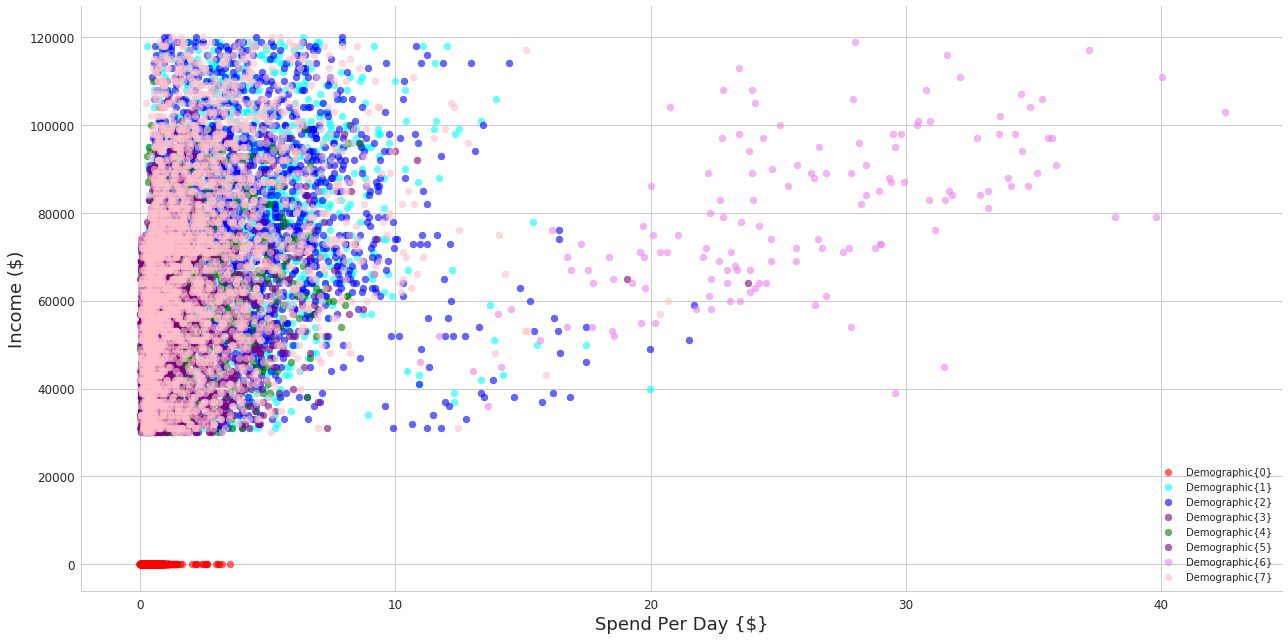

In [283]:
fig, ax = plt.subplots(figsize=(18,9))
for demographic in [0,1,2,3,4,5,6,7]:
    df = demographics_output[demographics_output['cluster'] == demographic]
    colors = ['red','cyan','blue','purple','green','purple','violet','pink']
    ax.scatter(df['spend per day'], df['income'], 
               color=colors[demographic], label=("Demographic" + str({demographic})),
              alpha=0.6)
ax.legend(loc=4, frameon=False)
ax.set_xlabel('Spend Per Day {$}', fontsize=18)
ax.set_ylabel('Income ($)', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

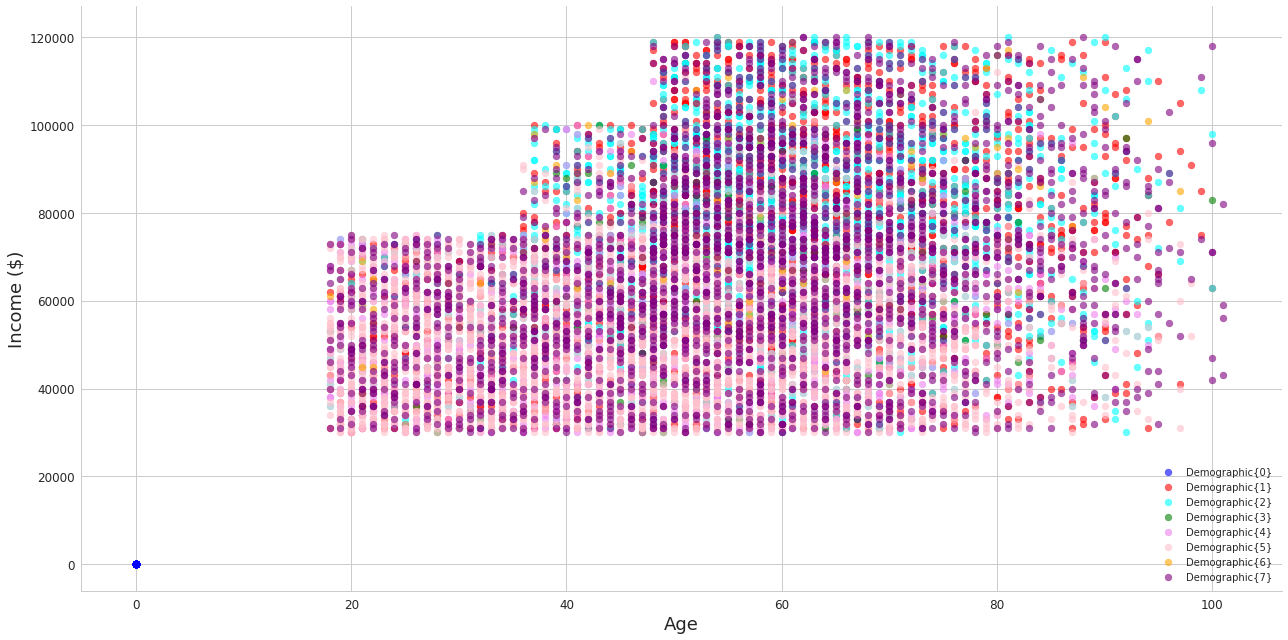

In [284]:
fig, ax = plt.subplots(figsize=(18,9))
for demographic in [0,1,2,3,4,5,6,7]:
    df = demographics_output[demographics_output['cluster'] == demographic]
    colors = ['blue','red','cyan','green','violet','pink','orange','purple']
    ax.scatter(df['age'], df['income'], 
               color=colors[demographic], label=("Demographic" + str({demographic})),
              alpha=0.6)
ax.legend(loc=4, frameon=False)
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Income ($)', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [190]:
joblib.dump(final_kmeans, 'model.pkl')
final_kmeans = joblib.load('kmeans_demographic_model.pkl')

['model.pkl']

In [285]:
profile_data_input = consumer_profile.drop(columns=['member joined',
                                              'person', 
                                              'total transactions', 
                                              'total spend'])

In [286]:
scaler = StandardScaler()
scaler.fit(profile_data_input)
input_demo_data = scaler.transform(profile_data_input)
predictions = final_kmeans.predict(input_demo_data)
updated_dataframe = consumer_profile
updated_dataframe['demographic'] = predictions

In [287]:
predictions = updated_dataframe
predictions.head(5)

,female,male,other,unknown gender,age,became_member_on,person,income,member joined,total transactions,total spend,spend per trans,spend per day,membership length,demographic
0,0,0,0,1,0,20170212,68be06ca386d4c31939f3a4f0e3dd783,0.0,2017-02-12,9,20.40,2.266667,0.680000,76.0,0
1,1,0,0,0,55,20170715,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15,3,77.01,25.670000,2.567000,54.0,7
2,0,0,0,1,0,20180712,38fe809add3b4fcf9315a9694bb96ff5,0.0,2018-07-12,5,10.21,2.042000,0.340333,2.0,0
3,1,0,0,0,75,20170509,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09,1,17.78,17.780000,0.592667,63.0,7
4,0,0,0,1,0,20170804,a03223e636434f42ac4c3df47e8bac43,0.0,2017-08-04,3,4.65,1.550000,0.155000,51.0,0


In [288]:
inb = pd.DataFrame(input_demo_data)

In [289]:
inb.shape

(14240, 10)

In [290]:
inb.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.424000e+04,1.424000e+04,1.424000e+04,1.424000e+04,1.424000e+04,1.424000e+04,1.424000e+04,1.424000e+04,1.424000e+04,1.424000e+04
mean,-4.989766e-18,-9.480556e-17,3.193450e-17,2.295293e-17,9.929635e-17,-8.533000e-14,6.885878e-17,9.530454e-17,2.345190e-17,6.486696e-18
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-7.452746e-01,-1.011158e+00,-1.086039e-01,-3.791769e-01,-1.946916e+00,-3.051290e+00,-1.919727e+00,-7.052693e-01,-6.909575e-01,-1.280846e+00
25%,-7.452746e-01,-1.011158e+00,-1.086039e-01,-3.791769e-01,-5.879144e-01,-5.217890e-01,-5.609744e-01,-5.518956e-01,-5.469995e-01,-7.578122e-01
50%,-7.452746e-01,9.889654e-01,-1.086039e-01,-3.791769e-01,1.945409e-01,3.448923e-01,5.046420e-02,-1.488995e-01,-3.289756e-01,-3.697550e-01
75%,1.341787e+00,9.889654e-01,-1.086039e-01,-3.791769e-01,6.887232e-01,3.882540e-01,6.279340e-01,3.601202e-01,2.324378e-01,6.594401e-01
max,1.341787e+00,9.889654e-01,9.207776e+00,2.637292e+00,2.212452e+00,1.195435e+00,2.156530e+00,3.732806e+01,1.220501e+01,3.105888e+00


In [291]:
x = np.random.randint(-7,9,10)
x = x.reshape(1,-1)

In [292]:
predictions = final_kmeans.predict(x)

In [293]:
predictions

array([2], dtype=int32)

# <center>Face, Age, Gender Recognition Module</center>

In [6]:
!apt-get update
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python

Get:1 http://ftp.us.debian.org/debian testing InRelease [116 kB]
Get:2 http://security.ubuntu.com/ubuntu xenial-security InRelease [109 kB]     
Hit:3 http://archive.ubuntu.com/ubuntu xenial InRelease                        
Get:4 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [109 kB]
Ign:1 http://ftp.us.debian.org/debian testing InRelease      
Get:5 http://ftp.us.debian.org/debian testing/main Sources.diff/Index [27.9 kB]
Hit:6 https://storage.googleapis.com/goog-dataproc-bigtop-repo-us-central1/1_3_deb9_20200506_014100-RC01 dataproc InRelease
Get:7 http://archive.ubuntu.com/ubuntu xenial-backports InRelease [107 kB]
Hit:8 https://storage.googleapis.com/dataproc-bigtop-repo/1_3_deb9_20200506_014100-RC01 dataproc InRelease
Get:9 http://ftp.us.debian.org/debian testing/main Sources 2020-06-10-2011.09.pdiff [2,029 B]
Get:10 http://ftp.us.debian.org/debian testing/main Sources 2020-06-11-0203.42.pdiff [30.4 kB]
Get:11 http://ftp.us.debian.org/debian testing/main Sources 2020-

#### UTK Face Dataset
Consists of 20k+ face images in the wild (only single face in one image)<br>
Provides the correspondingly aligned and cropped faces<br>
Provides the corresponding landmarks (68 points)<br>
Images are labelled by age, gender, and ethnicity.<br>

In [7]:
import numpy as np
import sklearn.metrics as metrics
import keras
import tensorflow as tf
from pyagender import PyAgender
import wide_residual_network as wrn
from keras.datasets import utkface
import keras.callbacks as callbacks
import keras.utils.np_utils as kutils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

from keras import backend as K
import warnings
warnings.filterwarnings("ignore")


batch_size = 100
nb_epoch = 100
img_rows, img_cols = 32, 32

(trainX, trainY), (testX, testY) = utkface.load_data()

trainX = trainX.astype('float32')
trainX = (trainX - trainX.mean(axis=0)) / (trainX.std(axis=0))
testX = testX.astype('float32')
testX = (testX - testX.mean(axis=0)) / (testX.std(axis=0))

tempY = testY
trainY = kutils.to_categorical(trainY)
testY = kutils.to_categorical(testY)

generator = ImageDataGenerator(rotation_range=10,
                               width_shift_range=5./32,
                               height_shift_range=5./32,
                               horizontal_flip=True)

generator.fit(trainX, seed=0, augment=True)

init_shape = (3, 32, 32) if K.image_dim_ordering() == 'th' else (32, 32, 3)

model = wrn.create_wide_residual_network(init_shape, nb_classes=10, N=4, k=8, dropout=0.0)

model.summary()

Wide Residual Network-28-8 created.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   432         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
_________________________________________________________________________

<img src="WRN.png" align="center"/>

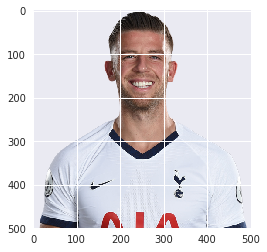

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from pyagender import PyAgender
agender = PyAgender() 
faces = agender.detect_genders_ages(cv2.imread('toby.png'))
img=mpimg.imread('toby.png')
imgplot = plt.imshow(img)
plt.show()

In [11]:
faces

[{'age': 32.1742695802177,
  'bottom': 265,
  'gender': 0.023865292,
  'height': 265,
  'left': 111,
  'right': 393,
  'top': 0,
  'width': 282}]

In [12]:
def gender(faces):
  if faces < 0.5:
    return "Male"
  else:
    return "Female"
x = float(faces[0]['gender'])
print("Gender detected : " + gender(x))
print("Age detected : " + str(int(faces[0]['age'])))

Gender detected : Male
Age detected : 32


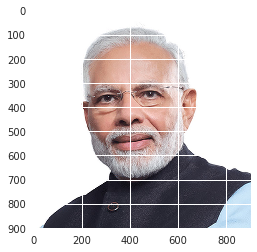

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('modi.jpg')
faces = agender.detect_genders_ages(cv2.imread('modi.jpg'))
x = float(faces[0]['gender'])
imgplot = plt.imshow(img)
plt.show()

In [14]:

print("Gender detected : " + gender(x))
print("Age detected : " + str(int(faces[0]['age'])))

Gender detected : Male
Age detected : 69


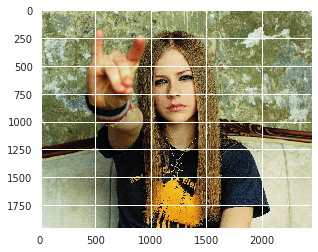

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('avril.jpg')
faces = agender.detect_genders_ages(cv2.imread('avril.jpg'))
x = float(faces[0]['gender'])
imgplot = plt.imshow(img)
plt.show()

In [16]:
print("Gender detected : " + gender(x))
print("Age detected : " + str(int(faces[0]['age'])))

Gender detected : Female
Age detected : 22
